
# Linear Regression models 
#### We will go over linear regression, regularization, ridge regression and lasso regression. 
##### (reduced ver of W2 of App ML)
Visit my web site for very good sources of ML
I use anaconda which has Jupyter in it. 


## Linear Regression

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression 
#function used for generating synthetic datasets

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge

#anaconda


### Data set 1: A synthetic data set

In [ ]:
# This is only for illustrative purposes. 
# This one generates random data to make some regression analysis. 
# We will make regression with other data sets soon. 

# synthetic dataset for simple regression
from sklearn.datasets import make_regression

plt.figure()
plt.title('Sample regression problem with one input variable')

X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()
#X_R1[:,0]

In [ ]:
X_R1

In [ ]:
X_R1[:,0]

In [ ]:
'''
LR_size = 25
X = np.random.randint(0, 9, (LR_size,1))

eps = np.random.normal(0,5,(LR_size,1))
beta0 = 30
beta1 = 4

Y = beta0 +  X*beta1 + eps
Y

plt.figure()
plt.title('Sample regression problem with one input variable')
plt.scatter(X, Y, marker= 'o', s=50)
plt.show()
'''

In [ ]:
print("dimension==>", X_R1.ndim,"length==>", X_R1.shape) 

In [ ]:
#splitting the data into train set and test set. 
# the default value i 75% train and 25% test

X_train, X_test, y_train, y_test = \
train_test_split(X_R1, y_R1,random_state=2)
# compare without random_state
 

In [ ]:
# compare without random_state
X_train

In [ ]:
print(X_test.shape, X_test.ndim) # gives the size of data

In [ ]:
TrainReg = LinearRegression().fit(X_train, y_train)





In [ ]:
FullReg = LinearRegression().fit(X_R1, y_R1)



In [ ]:
print('linear model coeff (Theta_1): {}'.format(TrainReg.coef_))
print('linear model intercept (Theta_0): {:.3f}'.format(TrainReg.intercept_))
print('R-squared score (training): {:.4f}'.format(TrainReg.score(X_train, y_train)))
print('R-squared score (test): {:.2f}'.format(TrainReg.score(X_test, y_test)))

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(X_R1, TrainReg.coef_ * X_R1 + TrainReg.intercept_, 'g-')


plt.scatter(X_R1, y_R1, marker= 'x', s=50, alpha=0.8)

#plt.plot(X_R1, FullReg.coef_ * X_R1 + FullReg.intercept_, 'r-')

plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()


## Data set 2: House Pricing


In [2]:
### An example for the house price data. 

house_price = pd.DataFrame (np.genfromtxt("house_price_data_2000.csv", \
            delimiter=";", skip_header=1, dtype=None))
house_price

,0,1,2,3
0,45,1,1,96000
1,48,1,1,115000
2,48,1,1,142500
3,49,1,1,147000
4,50,1,1,125000
...,...,...,...,...
1817,289,7,1,825000
1818,300,4,2,680000
1819,320,5,2,820000
1820,320,3,2,950000


In [3]:
print(house_price.ndim , house_price.shape)

2 (1822, 4)


In [4]:
X_house = house_price.iloc[:  , 0:3] #from 0(inclusive) to 3(exclusive)
y_house = house_price.iloc[:, -1]

#X_house = house_price[:, 0:6]
#y_house = house_price[:, 6]

In [6]:
X_house.head()

,0,1,2
0,45,1,1
1,48,1,1
2,48,1,1
3,49,1,1
4,50,1,1


In [ ]:
plt.scatter(X_house.iloc[:,0], y_house, marker= 'o', s=50)
#size

In [ ]:
plt.scatter(X_house.iloc[:,1], y_house, marker= 'o', s=50)
# room

In [ ]:
plt.scatter(X_house.iloc[:,2], y_house, marker= 'o', s=50)
#bath room for 2000
#living room for 5000

In [ ]:
# plt.scatter(X_house[:,3], y_house, marker= 'o', s=50)
# bathroom

In [ ]:
### plt.scatter(X_house[:,4], y_house, marker= 'o', s=50)
# floor

In [ ]:
### plt.scatter(X_house[:,5], y_house, marker= 'x', s=50)
# age

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_house, y_house)

In [9]:
X_test

,0,1,2
1749,199,3,2
1399,133,3,1
1305,125,3,2
153,74,2,1
1506,145,3,2
...,...,...,...
1031,110,2,1
858,96,2,1
129,70,2,1
1611,160,3,2


In [10]:
linreg = LinearRegression().fit(X_train, y_train)


In [11]:
linreg.score(X_train,y_test) 
#As the score, it gives R2 values (from stats course)
#it does not give the  J(Theta)

ValueError: Found input variables with inconsistent numbers of samples: [456, 1366]

In [12]:
print('linear model intercept (Theta_0): {:.1f}'.format(linreg.intercept_))
print('linear model coeff (Theta_1): {}'.format(linreg.coef_))
print('R2-Train',round(linreg.score(X_train, y_train),3), \
       'R2-Test',round(linreg.score(X_test, y_test),3))



linear model intercept (Theta_0): 2152.2
linear model coeff (Theta_1): [2454.65152121 2459.29499361  207.44030124]
R2-Train 0.894 R2-Test 0.871


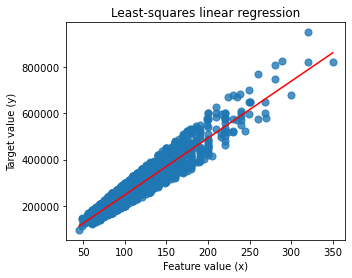

In [13]:
plt.figure(figsize=(5,4))
plt.scatter(X_house.iloc[:,0], y_house, marker= 'o', s=50, alpha=0.8)
plt.plot(X_house.iloc[:,0], linreg.coef_[0] * X_house.iloc[:,0] + linreg.intercept_, 'r-')

plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

# Ridge Regression (linear regression with regularization)

### We will use  the same dataset (house pricing)
##### We will learn n-fold cross validation and scaling. 

In [ ]:
from sklearn.linear_model import Ridge

linridge = Ridge(alpha=99900000000000).fit(X_train, y_train)
#linridge = Ridge(alpha=10).fit(X_train, y_train)



In [ ]:
print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))
print('R2-Train',round(linridge.score(X_train, y_train),3), 'R2-Test',round(linridge.score(X_test, y_test),3))

print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))
#we print the coefficients that are non zero. 



In [ ]:
# What happens if  alpha value is 10^9!!!

In [ ]:
y_train.mean()

# n-fold Cross Validation. 

In [14]:
from sklearn.model_selection import cross_val_score

linridge = Ridge(alpha=0) #create a Ridge object 
#remember the ridge regression is something like this:
#linridge = Ridge(alpha=9000000).fit(X_train, y_train)


scores = cross_val_score(linridge, X_house, y_house, cv=5, scoring="r2")

#put the Ridge object [linridge] to the cross_val_Score 
scores

array([ 0.42992258,  0.01027865, -0.02609218, -0.13845273,  0.70225699])

In [ ]:
#### Why do we have so bad values?????




































# Because it is an ordered set. 











## n-fold Cross Validation with Shuffling

In [ ]:
from sklearn.model_selection import KFold

kf5 = KFold(n_splits=5, shuffle=True)

scores = cross_val_score(linridge, X_house, y_house, cv=kf5, scoring="r2")
#scores = cross_val_score(linridge, X_house, y_house, cv=5, scoring="r2")

scores

## How to apply a scaler? 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# crime data set

##X_train, X_test, y_train, y_test = train_test_split(X_house, y_house)

X_train_scaled = scaler.fit_transform(X_train) # we use X_train to adjust/fit the scaler

X_test_scaled  = scaler.transform(X_test) #use the same fit found above to transform X_test

linridge = Ridge(alpha=2).fit(X_train_scaled, y_train)

print('R2-Train',round(linridge.score(X_train_scaled, y_train),3), \
       'R2-Test',round(linridge.score(X_test_scaled, y_test),3))


In [ ]:
X_train

In [ ]:
### Better in understanding the regularization. 
 ## Recall we used 10^9 to make all of the parameters zero. 

## Data set 3: Customized Computer Dataset


In [15]:

# this is a dataset which represent the cost of customized computers. 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
CostData1 = pd.read_excel('CostV1.xlsx')
CostData1



,Power,YG,AG-1,AG-2,Con,Uk,Temp,Po,Pk,Cost
0,50,33.0,0.4,NaN,Yzn11,4.4,40,0.105,0.825,1425
1,100,33.0,0.4,NaN,Yzn11,4.4,40,0.170,1.000,1888
2,160,33.0,0.4,NaN,Yzn11,4.4,40,0.242,2.000,2005
3,250,33.0,0.4,NaN,Dyn11,4.4,40,0.345,3.000,2705
4,400,33.0,0.4,NaN,Dyn11,4.4,40,0.495,4.000,3232
5,630,33.0,0.4,NaN,Dyn11,4.4,40,0.690,5.060,4110
6,800,33.0,0.4,NaN,Dyn11,6.0,40,0.750,6.600,5383
7,1000,33.0,0.4,0.4,Dyn11d0,6.0,40,0.885,8.360,5910
8,1250,33.0,0.4,0.4,Dyn11d0,6.0,40,1.000,10.450,6522
9,1600,33.0,0.4,NaN,Dyn11,6.0,40,1.380,13.200,7105


In [21]:
CostData1

,Power,YG,AG-1,AG-2,Uk,Temp,Po,Pk,Cost,Con_Dyn11,Con_Dyn11d0,Con_Yzn11
0,50,33.0,0.4,0.0,4.4,40,0.105,0.825,1425,0,0,1
1,100,33.0,0.4,0.0,4.4,40,0.170,1.000,1888,0,0,1
2,160,33.0,0.4,0.0,4.4,40,0.242,2.000,2005,0,0,1
3,250,33.0,0.4,0.0,4.4,40,0.345,3.000,2705,1,0,0
4,400,33.0,0.4,0.0,4.4,40,0.495,4.000,3232,1,0,0
5,630,33.0,0.4,0.0,4.4,40,0.690,5.060,4110,1,0,0
6,800,33.0,0.4,0.0,6.0,40,0.750,6.600,5383,1,0,0
7,1000,33.0,0.4,0.4,6.0,40,0.885,8.360,5910,0,1,0
8,1250,33.0,0.4,0.4,6.0,40,1.000,10.450,6522,0,1,0
9,1600,33.0,0.4,0.0,6.0,40,1.380,13.200,7105,1,0,0


In [17]:
print("Dim-->", CostData1.ndim, "Length->",CostData1.shape)




Dim--> 2 Length-> (38, 10)


In [20]:
CostData1["AG-2"] = CostData1["AG-2"].fillna(0) #fill the NaNs with Zeros
CostData1



,Power,YG,AG-1,AG-2,Uk,Temp,Po,Pk,Cost,Con_Dyn11,Con_Dyn11d0,Con_Yzn11
0,50,33.0,0.4,0.0,4.4,40,0.105,0.825,1425,0,0,1
1,100,33.0,0.4,0.0,4.4,40,0.170,1.000,1888,0,0,1
2,160,33.0,0.4,0.0,4.4,40,0.242,2.000,2005,0,0,1
3,250,33.0,0.4,0.0,4.4,40,0.345,3.000,2705,1,0,0
4,400,33.0,0.4,0.0,4.4,40,0.495,4.000,3232,1,0,0
5,630,33.0,0.4,0.0,4.4,40,0.690,5.060,4110,1,0,0
6,800,33.0,0.4,0.0,6.0,40,0.750,6.600,5383,1,0,0
7,1000,33.0,0.4,0.4,6.0,40,0.885,8.360,5910,0,1,0
8,1250,33.0,0.4,0.4,6.0,40,1.000,10.450,6522,0,1,0
9,1600,33.0,0.4,0.0,6.0,40,1.380,13.200,7105,1,0,0


In [19]:
CostData1 = pd.get_dummies(CostData1) #Cha
CostData1



,Power,YG,AG-1,AG-2,Uk,Temp,Po,Pk,Cost,Con_Dyn11,Con_Dyn11d0,Con_Yzn11
0,50,33.0,0.4,0.0,4.4,40,0.105,0.825,1425,0,0,1
1,100,33.0,0.4,0.0,4.4,40,0.170,1.000,1888,0,0,1
2,160,33.0,0.4,0.0,4.4,40,0.242,2.000,2005,0,0,1
3,250,33.0,0.4,0.0,4.4,40,0.345,3.000,2705,1,0,0
4,400,33.0,0.4,0.0,4.4,40,0.495,4.000,3232,1,0,0
5,630,33.0,0.4,0.0,4.4,40,0.690,5.060,4110,1,0,0
6,800,33.0,0.4,0.0,6.0,40,0.750,6.600,5383,1,0,0
7,1000,33.0,0.4,0.4,6.0,40,0.885,8.360,5910,0,1,0
8,1250,33.0,0.4,0.4,6.0,40,1.000,10.450,6522,0,1,0
9,1600,33.0,0.4,0.0,6.0,40,1.380,13.200,7105,1,0,0


In [22]:
y_CostData1 = CostData1['Cost']
y_CostData1.head()



0    1425
1    1888
2    2005
3    2705
4    3232
Name: Cost, dtype: int64

In [23]:

X_CostData1 = CostData1.drop("Cost",axis=1)
X_CostData1.head()


,Power,YG,AG-1,AG-2,Uk,Temp,Po,Pk,Con_Dyn11,Con_Dyn11d0,Con_Yzn11
0,50,33.0,0.4,0.0,4.4,40,0.105,0.825,0,0,1
1,100,33.0,0.4,0.0,4.4,40,0.170,1.000,0,0,1
2,160,33.0,0.4,0.0,4.4,40,0.242,2.000,0,0,1
3,250,33.0,0.4,0.0,4.4,40,0.345,3.000,1,0,0
4,400,33.0,0.4,0.0,4.4,40,0.495,4.000,1,0,0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_CostData1, y_CostData1,random_state=12)
linridge = Ridge(alpha=0).fit(X_train, y_train)                                                   

print('Training',round(linridge.score(X_train, y_train),3), 'Test',round(linridge.score(X_test, y_test),3))

#also try  random_state=12

Training 0.76 Test 0.374


In [34]:
#for CostV1.xlsx check for random state 1 and 2 and 5
#random state 12 is fine with alpha for dataset 2

linridge = Ridge(alpha=0.04).fit(X_train, y_train)                                                   
print('Training',round(linridge.score(X_train, y_train),3), 'Test',round(linridge.score(X_test, y_test),3))

Training 0.757 Test 0.715


## LASSO REGRESSION
#### with the house data set

In [35]:
from sklearn.linear_model import Lasso

house_price = pd.DataFrame (np.genfromtxt("house_price_data_2000.csv", delimiter=";", skip_header=1, dtype=None))

X_house = house_price.iloc[:  , 0:3] #from 0(inclusive) to 3(exclusive)
y_house = house_price.iloc[:, 3]

X_train, X_test, y_train, y_test = train_test_split(X_house, y_house)
lassores = Lasso(alpha=10).fit(X_train, y_train)

print('Intercept', lassores.intercept_)
print('Coeff',lassores.coef_)
print('R2-Train',round(lassores.score(X_train, y_train),3), 'R2-Test',round(lassores.score(X_test, y_test),3))

print('Number of non-zero features: {}'.format(np.sum(lassores.coef_ != 0)))


Intercept 6232.174778781307
Coeff [2426.07731206 1212.79955081 1877.01898162]
R2-Train 0.886 R2-Test 0.895
Number of non-zero features: 3


In [38]:
################################################
#### Check for different alpha values. #########
################################################

for this_alpha in [0, 1, 2, 3, 4, 1000, 10000,100000, 1000000, 2000000, 3000000, 4000000]:

#[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40]:
    lassores = Lasso(alpha=this_alpha).fit(X_train, y_train)
    r2_train = lassores.score(X_train, y_train)
    r2_test  = lassores.score(X_test,  y_test)
    num_coeff_bigger = np.sum(abs(lassores.coef_) > 0.01)
    print(lassores.intercept_)
    print('Alpha = {:.3f}\nnum abs(coeff) > 0.01: {}, r-squared training: {:.3f}, r-squared test: {:.3f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))
    print(lassores.coef_, "\n\n")

6179.643860444659
Alpha = 0.000
num abs(coeff) > 0.01: 3, r-squared training: 0.886, r-squared test: 0.895

[2424.96893006 1250.2700156  1938.84288952] 


6184.864272504754
Alpha = 1.000
num abs(coeff) > 0.01: 3, r-squared training: 0.886, r-squared test: 0.895

[2425.08246999 1246.44317407 1932.608404  ] 


6190.109482603904
Alpha = 2.000
num abs(coeff) > 0.01: 3, r-squared training: 0.886, r-squared test: 0.895

[2425.19395979 1242.67688259 1926.41344896] 


6195.343332451768
Alpha = 3.000
num abs(coeff) > 0.01: 3, r-squared training: 0.886, r-squared test: 0.895

[2425.30638873 1238.88285444 1920.20038508] 


6200.560306782601
Alpha = 4.000
num abs(coeff) > 0.01: 3, r-squared training: 0.886, r-squared test: 0.895

[2425.4202127  1235.04762581 1913.9604212 ] 


7929.114063388959
Alpha = 1000.000
num abs(coeff) > 0.01: 1, r-squared training: 0.886, r-squared test: 0.895

[2460.51785883    0.            0.        ] 


8589.873148149461
Alpha = 10000.000
num abs(coeff) > 0.01: 1, r-squ

C:\Users\mggul\AppData\Local\Temp/ipykernel_21920/4220329612.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lassores = Lasso(alpha=this_alpha).fit(X_train, y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 821239962310.7234, tolerance: 1436784300.0277314
  model = cd_fast.enet_coordinate_descent(


In [ ]:
   
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# # # Check for different alpha values with normalization       # # # # # # # # # # # #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train) # we use X_train to adjust/fit the scaler
X_test_scaled  = scaler.transform(X_test) #use the same fit found above to transform X_test

for this_alpha in [1000, 2000,3000,4000,5000,6000,7000,8000,9000,10000]:

#[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40]:
    lassores = Lasso(alpha=this_alpha).fit(X_train_scaled, y_train)

    r2_train = lassores.score(X_train_scaled, y_train)
    r2_test  = lassores.score(X_test_scaled,  y_test)
    num_coeff_bigger = np.sum(abs(lassores.coef_) > 1)
    print('Alpha = {:.3f}\nnum abs(coeff) > 0.01: {}, \
r-squared training: {:.3f}, r-squared test: {:.3f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

## Polynomial Regression


In [ ]:
# In order to apply this, I generate a sythetic data set:7

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression #function used for generating synthetic datasets

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge

plt.figure()
plt.title('Regression problem with 7 inputs and only 5 of them is related with y.')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_friedman1.html
    
'''y(X) = 10 * sin(pi * X[:, 0] * X[:, 1]) + 
20 * (X[:, 2] - 0.5) ** 2 + 10 * X[:, 3] + 5 * X[:, 4] 
+ noise * N(0, 1).
'''

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state = 0)

linreg = LinearRegression().fit(X_train, y_train)

R2Train_beforepolynomial= linreg.score(X_train, y_train)
R2Test_beforepolynomial= linreg.score(X_test, y_test)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(R2Train_beforepolynomial))
print('R-squared score (test): {:.3f}'
     .format(R2Test_beforepolynomial))



In [ ]:
print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)

#First try it on a simple dataset

X_my = np.random.randint(10, size=(5, 2)) 
print("X_my", X_my)

In [ ]:
X_F1_poly_try = poly.fit_transform(X_my) #using the values in X_my, generate new set of features 
#called X_F1-poly

print("X_F1_poly_try", X_F1_poly_try)

In [ ]:
# Now, transform the previous data with this polynomial features
X_F1_poly = poly.fit_transform(X_F1) #using the values in X_F1, generate new set of features called X_F1

print(X_F1_poly)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

#print('(poly deg 2) linear model coeff (w):\n{}'.format(linreg.coef_))
#print('(poly deg 2) linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print("!!Compare with previous results without polynomial features:")
print('R-squared score (training): {:.3f}'
     .format(R2Train_beforepolynomial))
print('R-squared score (test): {:.3f}'
     .format(R2Test_beforepolynomial))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = Ridge(alpha=1).fit(X_train, y_train)

#print('(poly deg 2) linear model coeff (w):\n{}'.format(linreg.coef_))
#print('(poly deg 2) linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

In [ ]:
# or try a lasso
from sklearn.linear_model import Lasso
lassores = Lasso(alpha=0.01).fit(X_train, y_train)

##################
## try 0.01    ###
##################

#print('(poly deg 2) linear model coeff (w):\n{}'.format(linreg.coef_))
#print('(poly deg 2) linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('R2-Train',round(lassores.score(X_train, y_train),4), 'R2-Test',round(lassores.score(X_test, y_test),4))

print('Number of non-zero features: {}'.format(np.sum(lassores.coef_ != 0)))


## Data set 4: Another House Pricing from the web. [try at home]

In [ ]:


from pandas import read_csv
from matplotlib import pyplot
import numpy as np


# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
housing = read_csv(url, header=None)
# summarize shape
housing.head()





In [ ]:

data = housing.values
X_housing, y_housing = data[:, :-1], data[:, -1]



In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_housing, y_housing)

linridge = Ridge(alpha=0).fit(X_train, y_train)

print('R2-Train',round(linridge.score(X_train, y_train),3), 'R2-Test',round(linridge.score(X_test, y_test),3))
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))


## Data set 5: Crime Data set [try at home]


In [ ]:
# https://archive.ics.uci.edu/ml/datasets/communities+and+crime
# a dataset which has about 100 features and try to estimate 
# several different outputs. These outputs are at the last 12 columns
# murders, murdPerPop, robberies, robbbPerPop, burglaries, burglPerPop,  
# larcenies, larcPerPop, autoTheft, autoTheftPerPop, assaults, assaultPerPop

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

CrimeData  = pd.read_csv("CrimeDataSetFULL.csv", delimiter=";",header=0) #choose the titles/labels/headers as the first row

CrimeData.head()

In [ ]:
X_Crime = CrimeData.iloc[:, 0:101] #predictive features. 

y_Crime = CrimeData.iloc[:,101] # value to be predicted

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Crime, y_Crime)
#try other random states. 0, 1, 2, 3, 4, 5
linridge = Ridge(alpha=0).fit(X_train, y_train)

print('R2-Train',round(linridge.score(X_train, y_train),3), 'R2-Test',round(linridge.score(X_test, y_test),3))

#### We apply 5 fold shuffled cross validation for all of the outputs through a for loop
#### That is we find the R2 for all of the output through the for loop. 

In [ ]:
scores = {}
X_Crime = CrimeData.iloc[:, 0:101]
linridge = Ridge(alpha=3)

kf5 = KFold(n_splits=5, shuffle=True)
for i in range(101,113):
    y_Crime = CrimeData.iloc[:,i]
    tempscores = cross_val_score(linridge, X_Crime, y_Crime, cv=kf5, scoring="r2")
    scores[i] = round(tempscores.mean(),3)
scores

### apply a min-max scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# crime data set
y_Crime = CrimeData.iloc[:,108] #this one has the smallest test set.It's larcenies or theft) 

X_train, X_test, y_train, y_test = train_test_split(X_Crime, y_Crime)

X_train_scaled = scaler.fit_transform(X_train) # we use X_train to adjust/fit the scaler
X_test_scaled  = scaler.transform(X_test) #use the same fit found above to transform X_test

linridge = Ridge(alpha=3).fit(X_train_scaled, y_train)

print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))

In [ ]:
###print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
#print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))
###print('R-squared score (training): {:.3f}'.format(linridge.score(X_train, y_train)))
###print('R-squared score (test): {:.3f}'.format(linridge.score(X_test, y_test)))
###print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

#### You can also checking for different regularization values (alpha value)

In [ ]:
y_Crime = CrimeData.iloc[:,108] #again the same y vector (larcenies or theft)
X_train, X_test, y_train, y_test = train_test_split(X_Crime, y_Crime)

for this_alpha in [0, 1, 2, 3, 4, 1000, 10000,100000, 1000000, 10000000, 10000000, 100000000]:

#[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40]:
    linridge = Ridge(alpha = this_alpha).fit(X_train, y_train)
    r2_train = linridge.score(X_train, y_train)
    r2_test  = linridge.score(X_test,  y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 0.01)
    print('Alpha = {:.2f}\nnum abs(coeff) > 0.01: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

#### You can also checking for different regularization values for _normalized data_

In [ ]:
y_Crime = CrimeData.iloc[:,108] #again the same y vector (larcenies or theft)
X_train, X_test, y_train, y_test = train_test_split(X_Crime, y_Crime)

X_train_scaled = scaler.fit_transform(X_train) # we use X_train to adjust/fit the scaler
X_test_scaled  = scaler.transform(X_test) #use the same fit found above to transform X_test

for this_alpha in [0, 1, 2, 3, 4, 1000, 10000,100000, 1000000, 10000000, 10000000, 100000000]:

#[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40]:
    linridge = Ridge(alpha=this_alpha).fit(X_train_scaled, y_train)

    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test  = linridge.score(X_test_scaled,  y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 0.01)
    print('Alpha = {:.2f}\nnum abs(coeff) > 0.01: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))
    

##### _You can also try shuffled n fold cross validation over this._